In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.style.use('ggplot')
matplotlib.style.use('bmh')

### Load the Dataset

- Loading a sample of the whole data since the uncompressed file size is 6 GB. 
- Rows are randomly selected from all over the dataset so that we can get a better representation of the whole data 

In [3]:
%%time

random.seed(1)


row_count = 40428968 #row count taken without opening the file,  wc -l train.csv

row_limit = 5000000 #sample size

skip = sorted(random.sample(xrange(row_count), row_count - row_limit))
skip.remove(0)

    
df = pd.read_csv('data/train.csv', delimiter = ',', skiprows= skip)

Wall time: 3min 9s


### Basic Info
- Size of the dataframe can be reduced if some of the data types can be changed from int64 to int16

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
id                  uint64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: int64(14), object(9), uint64(1)
memory usage: 915.5+ MB


### Hidden Variable
- Check the maximum value of the hidden variables in order to decide which ones can be changed to int16
- C20 is the only one that won't fit in int16. All the data types are redeclared in **dtype**.

In [5]:
df[ ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'] ].describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.004968e+03,1.884067e+04,3.188763e+02,6.011793e+01,2.112478e+03,1.433688e+00,2.271455e+02,5.323139e+04,8.332640e+01
std,1.094173e+00,4.959499e+03,2.122068e+01,4.731084e+01,6.093685e+02,1.326277e+00,3.509464e+02,4.995587e+04,7.027588e+01
min,1.001000e+03,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,1.005000e+03,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,1.005000e+03,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.005000e+03,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000900e+05,1.010000e+02
max,1.012000e+03,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02


In [6]:
dtype = {
    'id': np.str, 'click': np.bool, 'hour': np.str,
    'C1': np.uint16, 'banner_pos': np.uint16,
    'site_id': np.str, 'site_domain': np.str, 'site_category': np.str,
    'app_id': np.str, 'app_domain': np.str, 'app_category': np.str,
    'device_id': np.str, 'device_ip': np.str, 'device_model': np.str, 'device_type': np.uint16, 
    'device_conn_type': np.uint16,
    'C14': np.uint16, 'C15': np.uint16, 'C16': np.uint16, 'C17': np.uint16, 
    'C18': np.uint16, 'C19': np.uint16, 'C20': np.uint32, 'C21': np.uint16    
}


In [7]:
%%time


df = pd.read_csv('data/train.csv', 
                   delimiter = ',', 
                   skiprows = skip, 
                   dtype = dtype)


Wall time: 1min 39s


#### Dataframe sized reduced by almost 40%

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
id                  object
click               bool
hour                object
C1                  uint16
banner_pos          uint16
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         uint16
device_conn_type    uint16
C14                 uint16
C15                 uint16
C16                 uint16
C17                 uint16
C18                 uint16
C19                 uint16
C20                 uint32
C21                 uint16
dtypes: bool(1), object(11), uint16(11), uint32(1)
memory usage: 548.4+ MB


In [9]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000371904215119486,False,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
1,10004482643316086592,False,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,66a5f0f3,d9b5648e,...,1,0,21234,320,50,2434,3,163,100088,61
2,10005541670676403131,False,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20984,320,50,2371,0,551,100217,46
3,10009147085943364421,False,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17037,320,50,1934,2,39,4294967295,16
4,10011085150831357375,False,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,4294967295,79


### Click Ratio
- Class Imbalance. Roughly 80% of the rows has Negative label.
- Surprisingly this should be more imbalanced for click data. Thus indicating Negative labels were downsampled. 

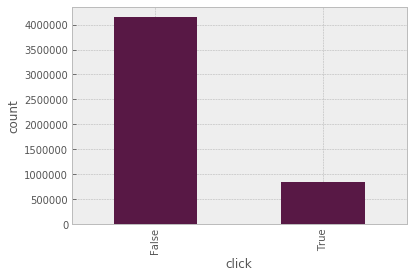

In [10]:
click_ratio = df.groupby('click').click.count()
click_ratio.plot(kind='bar', color = ['#581845', '#FF5733'])
plt.ylabel("count")
plt.show()

### Hidden Features
- Likely to be pixel data. 
- The goal of the visualization is to get a general overview of how each attributes of each hidden features are affecting the labels. 
- Hidden features with large number of attributes such as C14, C17, C20 and C21 appears to act as better indicator of positive labels.

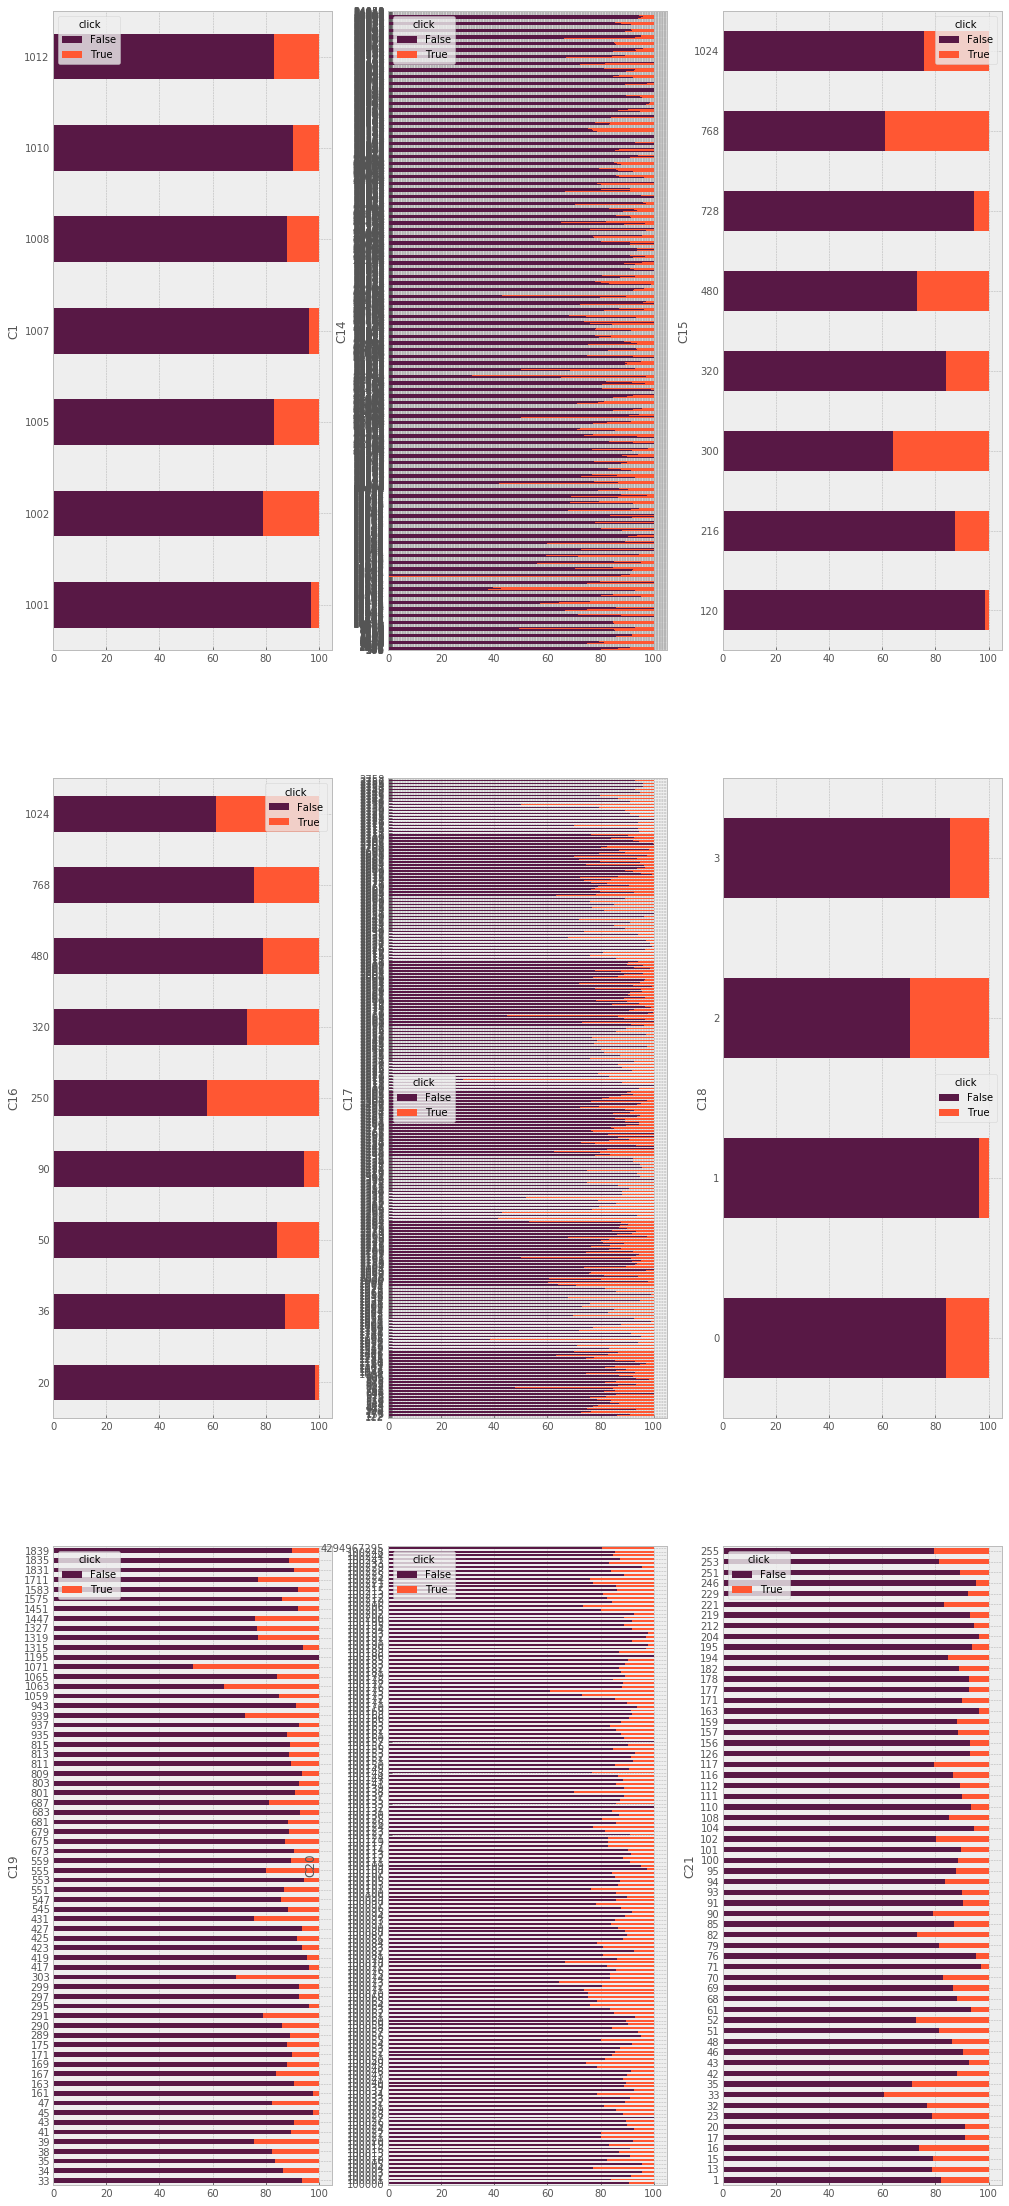

In [11]:
# Samping the scatter plot functionality

hidden_features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

fig, axes = plt.subplots(figsize=(17,40), nrows=3, ncols=3)



x=0
for r in np.arange(3):
    for c in np.arange(3):
        
        count_df = df.groupby([hidden_features[x], 'click']).click.count()
        sum_df = df.groupby([hidden_features[x]]).click.count()
        ratio_df = (count_df/sum_df) * 100
        ratio_df.unstack().plot(kind = 'barh', color = ['#581845', '#FF5733'], stacked =  True, ax = axes[r,c])
        # remove_border(axes[r][c], top=False, right=True, left=True, bottom=True)
        
        x = x + 1



plt.show()

### Click by hour
- The goal was to understand whether the click ratio increases at any particular time of the day.
- The ratio stays within the range of 16-18% throughout the day for the positive labels indicating that distribution of click ratio is similar throughout the day.
- Unsurprisingly frequency of the impression observed increases from 8AM to 1PM and then slowly decreases again.

In [12]:
df['hour'] = df['hour'].apply(lambda x: pd.datetime.strptime(x, '%y%m%d%H'))
df['hour_of_day'] = df['hour'].apply(lambda x: x.hour)

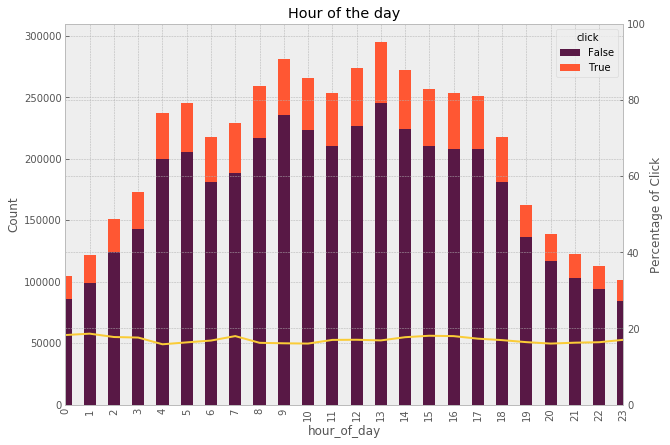

In [13]:
fig, ax0 = plt.subplots(figsize=(10,7))
ax1 = ax0.twinx()

hourday_df = df.groupby(['hour_of_day', 'click']).size()
hourday_df.unstack().plot(kind='bar', stacked=True, color = ['#581845', '#FF5733'], title="Hour of the day", ax = ax0)

click_by_hour = (df[df.click == 1].groupby(['hour_of_day']).size()/ df.groupby(['hour_of_day']).size()) * 100

click_by_hour.plot(kind= 'line', ylim=(0, 100), ax = ax1, color = '#FACC37')

ax0.set_ylabel("Count")
ax1.set_ylabel("Percentage of Click")

plt.show()

### Device Columns
- Device IP is unique and synonymous with id.
- Less frequent attributes for Device Type and Device Coonection Type does not appear to be a good indicator of positive labels.

In [14]:
df[['id', 'device_ip']].groupby(['id', 'device_ip']).device_ip.count().reset_index(name="count").describe()

,count
count,5000000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


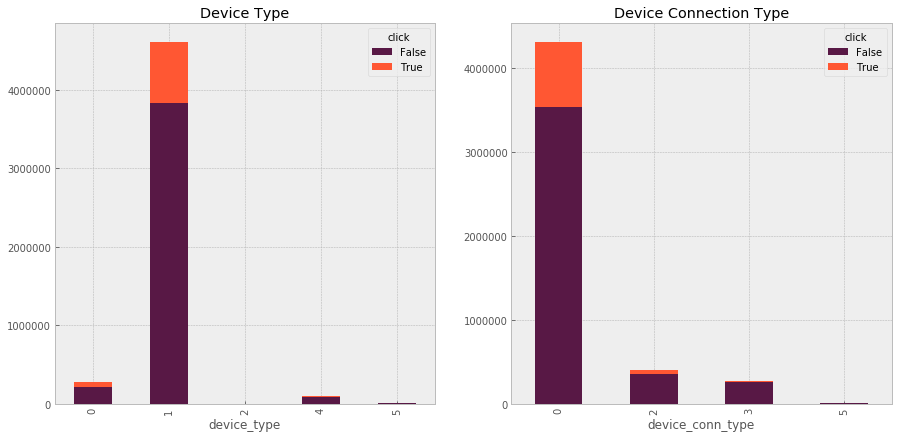

In [15]:
fig, axes = plt.subplots(figsize=(15,7),nrows=1, ncols=2)

device_type = df.groupby(['device_type', 'click']).size()
device_type.unstack().plot(kind='bar', stacked=True, color= ['#581845', '#FF5733'], title='Device Type', ax= axes[0])

device_conn = df.groupby(['device_conn_type', 'click']).size()
device_conn.unstack().plot(kind='bar', stacked=True, color= ['#581845', '#FF5733'], title='Device Connection Type', ax = axes[1])

plt.show()

### Banner Position
- Position 0 and 1 are the most frequent. 
- Zooming into the rest of the data by eliminating Position 0 and 1 indicates Position 7 is a good indicator of positive label.

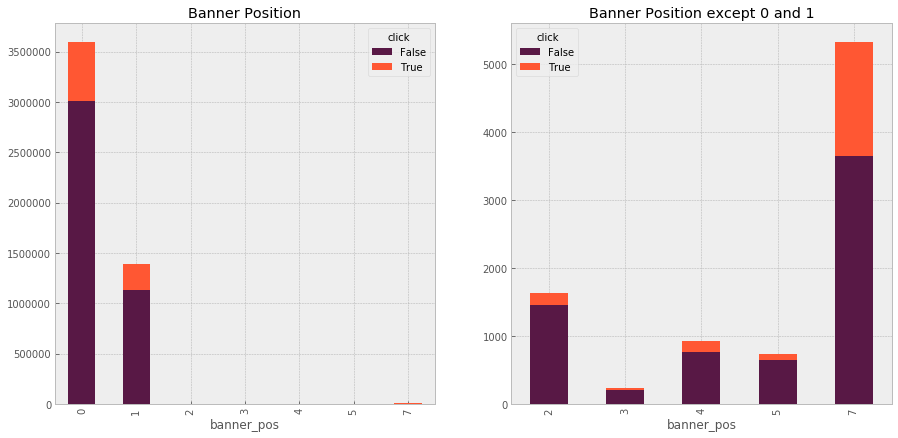

In [16]:
fig, axes = plt.subplots(figsize=(15,7),nrows=1, ncols=2)

banner_pos = df.groupby(['banner_pos', 'click']).size()
banner_pos.unstack().plot(kind='bar', stacked=True, color= ['#581845', '#FF5733'], title='Banner Position', ax= axes[0])

banner_pos_zoom = banner_pos.iloc[4:]
banner_pos_zoom.unstack().plot(kind='bar', stacked=True, color= ['#581845', '#FF5733'], title='Banner Position except 0 and 1', ax = axes[1])

plt.show()

### Site and App Columns
- Site and App Columns IDs are complementary. Maybe it is better to merge these feature together to save space.

In [17]:
df[['app_id', 'app_domain', 'app_category']].describe()

,app_id,app_domain,app_category
count,5000000,5000000,5000000
unique,5212,331,28
top,ecad2386,7801e8d9,07d7df22
freq,3195497,3368950,3236944


In [18]:
df[['site_id', 'site_domain', 'site_category']].describe()

,site_id,site_domain,site_category
count,5000000,5000000,5000000
unique,3578,4499,24
top,85f751fd,c4e18dd6,50e219e0
freq,1804503,1870681,2044045


In [19]:
df[(df.app_id == 'ecad2386') & (df.site_id == '85f751fd')].id.count() #these two ids never occured together

0